<a href="https://colab.research.google.com/github/LivingstonTardzenyuy/Deep-Learning-with-TensorFlow/blob/main/03_introduction_to_computer_vision_with_tensorflow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow.

Computer vision is the practice of writing algorithms which can discover patterns in visual data, such as the Camera of a self-driving car recognizing the car in front.

## Get the data.
The images we're working with are from the Food101 dataset. However we have modified it to only use 2 classes (pizza and steak).    

**Note** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work ) before scaling up.

In [ ]:

import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file.
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-02-07 04:18:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   138MB/s    in 0.8s    

2025-02-07 04:18:58 (138 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# Inspect the data (Become one with it)

A very crucial step at the beginning of any machine learing project is becoming one with the data.

And for a computer vision project this means visualizing many samples.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [ ]:
import os

# Walk thourhg a pizza_steak directory and list number of files.
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
!ls pizza_steak

test  train


In [ ]:
# Another way to find out how many images are in a file.
num_pizza_images_train = len(os.listdir("pizza_steak/train/pizza"))
print(num_pizza_images_train)

750


### To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the classnames programmatically.
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read the image and plot in matplotlib.
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

Image shape: (512, 512, 3)


array([[[  9,   7,   8],
        [  8,   6,   7],
        [  7,   5,   6],
        ...,
        [ 30,  24,  24],
        [ 31,  25,  25],
        [ 31,  25,  25]],

       [[ 13,  11,  12],
        [ 13,  11,  12],
        [ 11,   9,  10],
        ...,
        [ 31,  25,  25],
        [ 32,  26,  26],
        [ 32,  26,  26]],

       [[ 28,  28,  30],
        [ 27,  27,  29],
        [ 25,  25,  27],
        ...,
        [ 31,  27,  26],
        [ 33,  27,  27],
        [ 33,  27,  27]],

       ...,

       [[160, 103,  92],
        [160, 103,  92],
        [171, 112, 104],
        ...,
        [185, 133,  73],
        [181, 129,  71],
        [179, 124,  67]],

       [[184, 125, 111],
        [171, 112,  98],
        [171, 111, 100],
        ...,
        [189, 132,  77],
        [188, 127,  73],
        [184, 123,  69]],

       [[210, 148, 133],
        [189, 127, 112],
        [179, 117, 104],
        ...,
        [198, 137,  83],
        [195, 132,  81],
        [193, 127,  77]]], dtype=uint8)
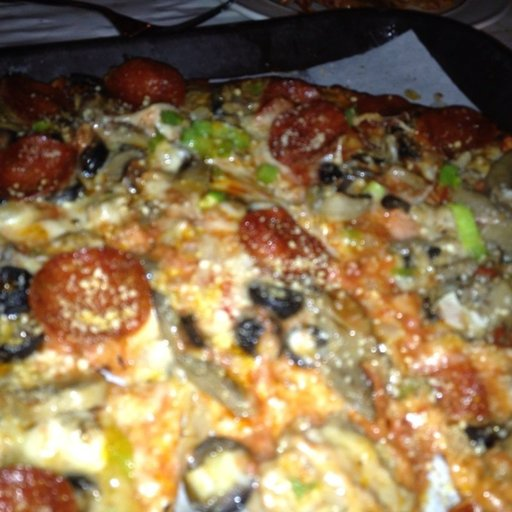

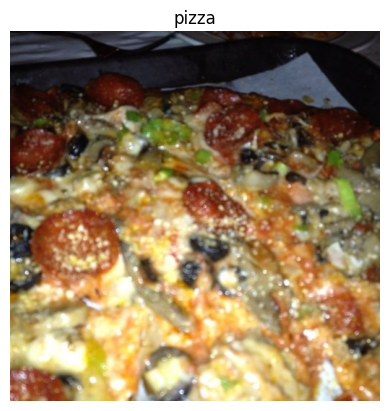

In [ ]:
# View a random image from the training dataset.
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")
img

In [ ]:
# View the image shape.
img.shape  # returns width, height, colour channels.

(512, 512, 3)

In [ ]:
 # Get all the pixel values between 0 and 1.
 img/255.

array([[[0.03529412, 0.02745098, 0.03137255],
        [0.03137255, 0.02352941, 0.02745098],
        [0.02745098, 0.01960784, 0.02352941],
        ...,
        [0.11764706, 0.09411765, 0.09411765],
        [0.12156863, 0.09803922, 0.09803922],
        [0.12156863, 0.09803922, 0.09803922]],

       [[0.05098039, 0.04313725, 0.04705882],
        [0.05098039, 0.04313725, 0.04705882],
        [0.04313725, 0.03529412, 0.03921569],
        ...,
        [0.12156863, 0.09803922, 0.09803922],
        [0.1254902 , 0.10196078, 0.10196078],
        [0.1254902 , 0.10196078, 0.10196078]],

       [[0.10980392, 0.10980392, 0.11764706],
        [0.10588235, 0.10588235, 0.11372549],
        [0.09803922, 0.09803922, 0.10588235],
        ...,
        [0.12156863, 0.10588235, 0.10196078],
        [0.12941176, 0.10588235, 0.10588235],
        [0.12941176, 0.10588235, 0.10588235]],

       ...,

       [[0.62745098, 0.40392157, 0.36078431],
        [0.62745098, 0.40392157, 0.36078431],
        [0.67058824, 0

 **Note** Machine Learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **Scale** (Also known as **Normalize** ) their pixel values by dividing the image arrays by 255. (Since 255 is the maximum pixel value).

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images.
* Build a CNN to find patterns in our images.
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed.
tf.random.set_seed(42)

# Preprocess data (Get all of the pixel values between 0 & 1, Also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our directories.
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches.
train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary',
    seed = 42
)

valid_data = valid_datagen.flow_from_directory(
    directory = test_dir,
    target_size = (224, 224),
    class_mode = "binary",
    seed = 42
)


# Build a CNN model same as the tiny VGG (same as the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile our CNN
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

# Fit the model.
history_1 = model_1.fit(
    train_data,   # The labels and data get created for us when we use flow_from_directory. i.e the X and Y.
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
  )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 319ms/step - accuracy: 0.5485 - loss: 0.6905 - val_accuracy: 0.7380 - val_loss: 0.5428
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.7691 - loss: 0.5011 - val_accuracy: 0.8320 - val_loss: 0.3625
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.8070 - loss: 0.4235 - val_accuracy: 0.8720 - val_loss: 0.3257
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.8379 - loss: 0.3652 - val_accuracy: 0.8660 - val_loss: 0.3194
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step - accuracy: 0.8736 - loss: 0.2995 - val_accuracy: 0.8560 - val_loss: 0.3434


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model.
model_2.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)


# Fit the model.
history_2 = model_2.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.4979 - loss: 0.7033 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - accuracy: 0.4970 - loss: 0.6961 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.4859 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.5155 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.5166 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931


In [ ]:
# Get model_2 summary
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having 20x more parameters than our CNN (model_1), let's improve it...

In [ ]:
# Set the random_seeed.
tf.random.set_seed(42)

# Create the model same as model but with more layers.
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model_3
model_3.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)


# Fit the model.
history_3 = model_3.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - accuracy: 0.6115 - loss: 6.6931 - val_accuracy: 0.7660 - val_loss: 0.5645
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - accuracy: 0.6732 - loss: 1.2022 - val_accuracy: 0.7860 - val_loss: 0.5056
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.7161 - loss: 0.8557 - val_accuracy: 0.7720 - val_loss: 0.4995
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.7445 - loss: 0.6525 - val_accuracy: 0.7140 - val_loss: 0.6377
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.7199 - loss: 0.6722 - val_accuracy: 0.7600 - val_loss: 0.8236


In [ ]:
  # Get a summary of model_3.
  model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

**Note:** You can think of trainable parameters as **patterns a model can learn from data**.

## Binary Classification: Let's break it down.

1. Become one with the data(visualize, visualize, visualize)
2. Preprocess the data (prepare it for our model, the main step here is scaling/Normalization)
3. Create a model (start with the baseline)
4. Fit the model.
5. Evaluate the model.
6. Adjust different parameters and adjust the model (Here we try to beat the baseline).
7. Repeat untill satisfied (experiment, experiment, experiment).

## 1. Become one with the data

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


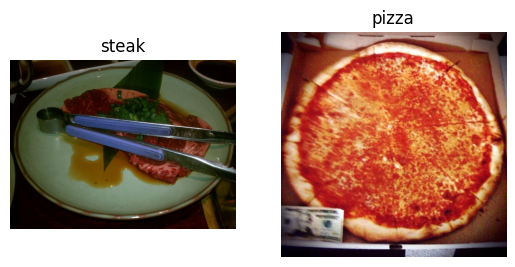

In [ ]:
# Visualize data.
plt.figure()
plt.subplot(1,2,1)
steak_image = view_random_image(target_dir="pizza_steak/train/",
                                 target_class="steak")
plt.subplot(1,2,2)
pizza_image = view_random_image(target_dir="pizza_steak/train/",
                                target_class="pizza")

### 2. Preprocess the data (prepare it for a model).

In [ ]:
# Define the directory dataset paths.

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is a small subset of the data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.  

It does this for a couple of reasons.
1. 10,000 images(or more) might not fit into the memoery of our processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32 ?.
Because 32 is good for your health...

In [ ]:
# Create train and test data generators and rescale the data.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:

# Load in our image data from directories and turn them into batches.
train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "binary",
    seed = 42
)

test_data = test_datagen.flow_from_directory(
    directory = test_dir,
    target_size=(224,224),
    batch_size = 32,
    class_mode = "binary",
    seed = 42
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch.
images, labels = next(train_data)   # Get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# Get the first two images.

images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.3137255 , 0.32941177, 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34509805, 0.3803922 ],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.38431376],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.3647059 , 0.40000004, 0.29411766],
          [0.38823533, 0.42352945, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.30980393],
          [0.30980393, 0.29803923, 0.2784314 ],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [ ]:
images[7].shape

(224, 224, 3)

## Create a CNN model (Start with a baseline)

A baseline is reletively a simple model or existing result that you setup when beginning a Machine Learning experiment, you try to beat the baseline.

> **Note** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required(e.g look at which current model is performing best in the field of your problem).

In [ ]:
# Make the creating of our model a little easier.
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer Convolutional neural network).
model_4 = Sequential([
    Conv2D(filters=10,   # Filters is the number of sliding windows going across an input(higher lead to complex model)
           kernel_size=8,  # Size of the sliding window going across the input.
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)
           ),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")   # output layer(working with binary classification so only 1 output neuron).
])


# Compile the model.
model_4.compile(
    loss="binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics =["accuracy"]
)

# Fit the model.
model_4_history = model_4.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.5776 - loss: 1.5638 - val_accuracy: 0.7720 - val_loss: 0.5050
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - accuracy: 0.7436 - loss: 0.5324 - val_accuracy: 0.7820 - val_loss: 0.4823
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.7656 - loss: 0.5125 - val_accuracy: 0.7860 - val_loss: 0.4597
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.7850 - loss: 0.4762 - val_accuracy: 0.8000 - val_loss: 0.4660
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.7899 - loss: 0.4396 - val_accuracy: 0.8320 - val_loss: 0.3925


### 5. Evaluating our model
it looks like our model is learning something, let's evaluate it.

<Axes: >

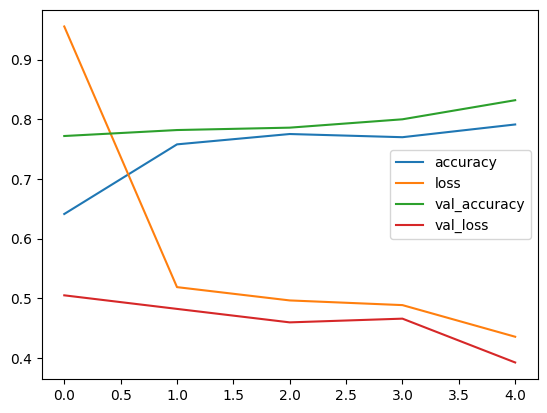

In [ ]:
import pandas as pd
pd.DataFrame(model_4_history.history).plot()

In [ ]:
model_4_history.history

{'accuracy': [0.6413333415985107,
  0.7580000162124634,
  0.7753333449363708,
  0.7699999809265137,
  0.7913333177566528],
 'loss': [0.9555283188819885,
  0.5187879800796509,
  0.49649983644485474,
  0.48866012692451477,
  0.43564653396606445],
 'val_accuracy': [0.7720000147819519,
  0.7820000052452087,
  0.7860000133514404,
  0.800000011920929,
  0.8320000171661377],
 'val_loss': [0.5050440430641174,
  0.48230960965156555,
  0.4597361981868744,
  0.4659675061702728,
  0.3925326466560364]}

In [ ]:
# Plot the validation and training curves seperately.
def plot_loss_curves(history):
  """
    Return seperate loss curves for training and validation matrics..
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()


  # Plot accuracy.
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

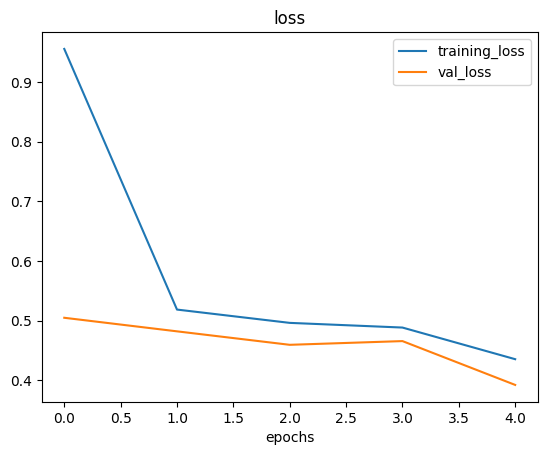

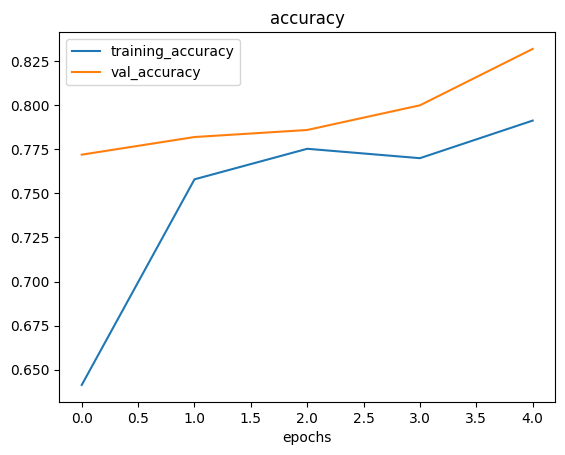

In [ ]:
# Plot loss curves.
plot_loss_curves(model_4_history)

 ### 6. Adjust the model parameters.

 Fitting a machine learning model comes in 3 steps:

 0. Create a baseline.
 1. Beat the baseline overfitting a larger model.
 2. Reduce overfitting.

 Ways to reduce overfitting....

* Increase the number of conv layers.
* Increase the number of conv filters
* Add another dense layer to the output of our flattend layer

Reduce:
* Add data augmentation.
* Add regulairization alyers (such as MaxPool2D)
* Add more data...

In [ ]:
# Create the model (this is going to be our new baseline).

model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),

])